# Neural Networks for Data Science Applications
## Final Homework: Putting everything together


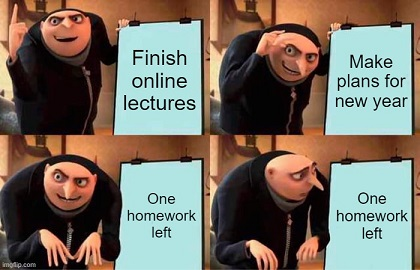

In [ ]:
import tensorflow as tf

**Important - before starting**: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*.

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts)... The task can be either classification or a more complex task (e.g., segmentation, sequence prediction, ...). *For tasks beyond classification, check carefully that the final exercise is viable before starting your implementation.*

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark, so you can select a complexity that you believe adequate to your skills.

**DESCRIPTION OF THE CODE**: 

**1. Task:**

For this homework I decided to perform a multi-class classification on images. 

**2. Dataset:**

The dataset is a large set of images of flowers and we have 5 different labels we could predict: *_dandelion, daisy, tulips, roses, sunflowers_*

The tf_flowers dataset is not partitioned into train, test and validation by default. To do that we can use the tfds.Split.TRAIN.subsplit function. This expects a tuple indicating the split ratio like so (8,1,1). This splits the data into 80%, 10% and 10% ratio for train, validation and test sets.







In [ ]:
## Libraries used

# Pre-trained model
import tensorflow_hub as hub

# Dataset
import tensorflow_datasets as tfds

# Extra
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
# Loading Dataset 
(training_set, validation_set, test_set), metadata = tfds.load(
    'tf_flowers',
    split=["train[:80%]","train[80%:90%]","train[90%:]"],
    with_info=True,
    as_supervised=True,
    shuffle_files = True
)

In [ ]:
training_set

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
# Info on dataset
num_classes = metadata.features['label'].num_classes

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0


for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

Total Number of Classes: 5
Total Number of Training Images: 2936
Total Number of Validation Images: 367
Total Number of Test Images: 367 



In [ ]:
# This is just to show that the images in the dataset don't have the same size
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (212, 320, 3) label: 3
Image 2 shape: (240, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 4
Image 4 shape: (333, 500, 3) label: 2
Image 5 shape: (212, 320, 3) label: 0


In [ ]:
# Preprocess dataset

# Sizes we'll use to reshape our dataset
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

# We are going to use shuffled mini-batches of the dataset
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1024


def resize_normalize(image,label):
  
  image = tf.cast(image,tf.float32)
  image = tf.image.resize(image,(image_size,image_size))
  image = image / 255.0
  
  return image,label


def augment(image, label):
  
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  
  return image,label

In [ ]:
# Reshape our dataset
train_batches = training_set.map(resize_normalize)
validation_batches = validation_set.map(resize_normalize)
test_batches = test_set.map(resize_normalize)

In [ ]:
# Data augmentation
train_batches = train_batches.map(augment)

In [ ]:
# Shuffling and creating batches
train_batches = train_batches.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation_batches.batch(BATCH_SIZE)
test_batches = test_batches.batch(BATCH_SIZE)
train_batches = train_batches.prefetch(tf.data.experimental.AUTOTUNE)

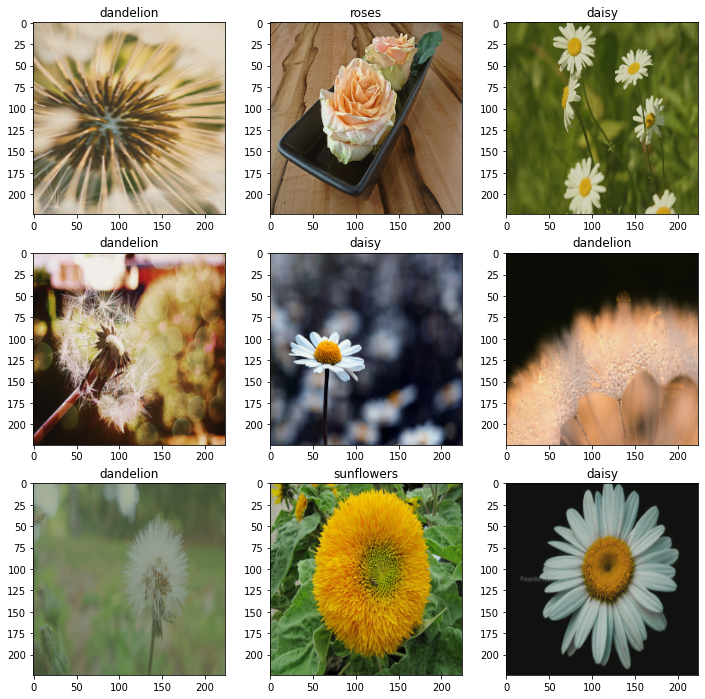

In [ ]:
# Visualize some images of the Train Set
%matplotlib inline

get_label_name = metadata.features['label'].int2str

plt.figure(figsize=(12,12)) 
for btch in train_batches.take(1):
  for i in range(9):
    img,lbl = btch[0][i],btch[1][i]
    plt.subplot(3,3,i+1)
    plt.title(get_label_name(lbl.numpy()))
    plt.imshow(img)  
plt.show()

### Exercise 1: Implement a custom object (5 points)

**This exercise is required only for students that have not submitted the mid-term homework, or for students who want to raise their mid-term mark (mark <= 3/5). For a mark of 4/5, an additional point can also be recovered during the exam.**

**To recap**: if you submitted the mid-term homework, implement only Exercises 2 and 3, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1, 2, and 3 for a total of *15 points*. 

[Papers With Code](https://paperswithcode.com/methods) is a repository of state-of-the-art tasks and components for deep networks, including:

1. [Optimizers](https://paperswithcode.com/methods/category/optimization)
2. [Residual components](https://paperswithcode.com/methods/category/skip-connection-blocks)
3. [Attention mechanisms](https://paperswithcode.com/methods/category/attention-mechanisms)
4. [Regularizers](https://paperswithcode.com/methods/category/regularization)
5. [Activation functions](https://paperswithcode.com/methods/category/activation-functions)
6. [Normalization blocks](https://paperswithcode.com/methods/category/normalization)
7. [Loss functions](https://paperswithcode.com/methods/category/loss-functions)
8. [Variants of feedforward networks](https://paperswithcode.com/methods/category/feedforward-networks)

Select a component in the categories above **not covered during the course**, and provide a working implementation in **TensorFlow 2.x**. A re-implementation is preferable; if you use an open implementation, state it clearly below. If you re-use parts of an open implementation, also state it clearly below.

**DESCRIPTION OF THE CODE**: *provide a small description of the method you have implemented, with all necessary links. If needed, explain why it is useful for the task you have selected (e.g., if implementing a different loss function).*

In [ ]:
# # Insert your custom component here
# class MyCustomDropout(tf.keras.Layer):
#   # ...

In [ ]:
# Optionally, briefly show how the component can be used

### Exercise 2: Train on your data (5 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. If you did Exercise 1, **include your custom component here**. Otherwise, you are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

**DESCRIPTION OF THE CODE**: 


**Models:**

I picked two different models for this homework in order to increase the accuracy on the test set and because I wanted to exploit both in *_exercise 3_*.  



*   **The first model** is a CNN architecture, the initial convolution has 32 filter, the second 64 and the last one 128. All of them use a padding so that the size of the output feauture-map is the same as the inpute feature-map and the kernel size is 3x3. To prevent overfitting, after all of the convulation layers I used a Dropout layer that randomly sets input units to 0 with a frequency of rate at each step during training time.
At the end I added some dense layers in order to perform classification.
*   **The second model**
The second approach involves *_transfer learning_*, so I took a pre-trained model and train the last layer (the **classifier layer**). The model I picked is MobileNetV2, this is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. 
(I got inspiration for this second model from the following notebook: https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c03_exercise_flowers_with_transfer_learning_solution.ipynb)

In [ ]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout, MaxPooling2D, Activation


#### 1. Model from scratch

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=IMG_SHAPE))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches,
                    epochs=80,
                    validation_data=validation_batches)

Epoch 1/80
92/92 [==============================] - 13s 101ms/step - loss: 1.7787 - accuracy: 0.2487 - val_loss: 1.4345 - val_accuracy: 0.3842
Epoch 2/80
92/92 [==============================] - 10s 92ms/step - loss: 1.4321 - accuracy: 0.3626 - val_loss: 1.3871 - val_accuracy: 0.4169
Epoch 3/80
92/92 [==============================] - 10s 93ms/step - loss: 1.3594 - accuracy: 0.3928 - val_loss: 1.1321 - val_accuracy: 0.5422
Epoch 4/80
92/92 [==============================] - 10s 93ms/step - loss: 1.2662 - accuracy: 0.4431 - val_loss: 1.2494 - val_accuracy: 0.4387
Epoch 5/80
92/92 [==============================] - 11s 93ms/step - loss: 1.2852 - accuracy: 0.4373 - val_loss: 1.1249 - val_accuracy: 0.5422
Epoch 6/80
92/92 [==============================] - 10s 93ms/step - loss: 1.2424 - accuracy: 0.4539 - val_loss: 1.2010 - val_accuracy: 0.5177
Epoch 7/80
92/92 [==============================] - 10s 93ms/step - loss: 1.2240 - accuracy: 0.4740 - val_loss: 1.1360 - val_accuracy: 0.5014
Epoch

#### 1.1 Results + Plots

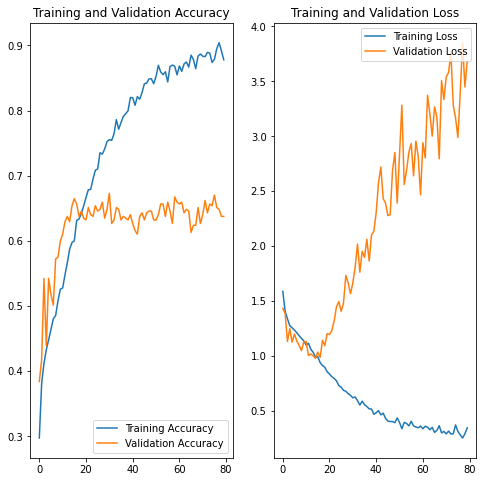

In [ ]:
# Train and validation graph 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Test
image_batch, label_batch = next(iter(test_batches))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

class_names = np.array(metadata.features['label'].names)

In [ ]:
predicted_batch = model.predict(image_batch)
# Removes dimensions of size 1 from the shape of a tensor
predicted_batch = tf.squeeze(predicted_batch).numpy()

# We take the id_s of the predicted classes and convert them into the actual labels
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

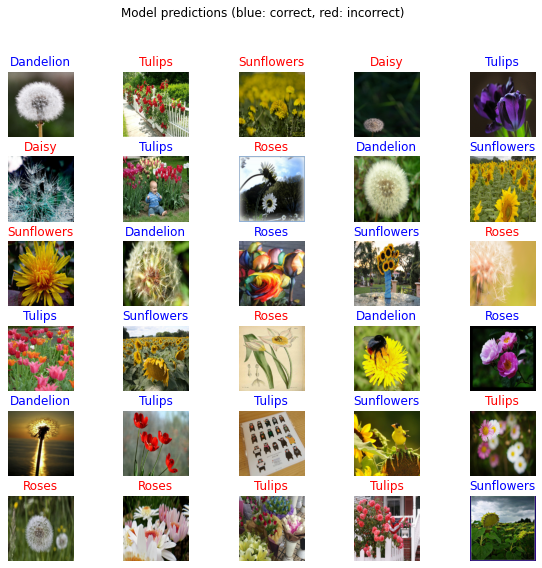

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

#### 2. Transfer learning model

In [ ]:
# Transfer learning method 
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=IMG_SHAPE)

In [ ]:
feature_extractor.trainable = False

In [ ]:
model2 = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(num_classes)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 6

history2 = model2.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6
92/92 [==============================] - 13s 91ms/step - loss: 1.2134 - accuracy: 0.5325 - val_loss: 0.4728 - val_accuracy: 0.8501
Epoch 2/6
92/92 [==============================] - 9s 81ms/step - loss: 0.5518 - accuracy: 0.7994 - val_loss: 0.3760 - val_accuracy: 0.8801
Epoch 3/6
92/92 [==============================] - 9s 80ms/step - loss: 0.4364 - accuracy: 0.8488 - val_loss: 0.3424 - val_accuracy: 0.8937
Epoch 4/6
92/92 [==============================] - 9s 81ms/step - loss: 0.3902 - accuracy: 0.8621 - val_loss: 0.3089 - val_accuracy: 0.9101
Epoch 5/6
92/92 [==============================] - 10s 81ms/step - loss: 0.3550 - accuracy: 0.8784 - val_loss: 0.3229 - val_accuracy: 0.9074
Epoch 6/6
92/92 [==============================] - 9s 80ms/step - loss: 0.3177 - accuracy: 0.8923 - val_loss: 0.2980 - val_accuracy: 0.9074


#### 2.1 Results + Plots

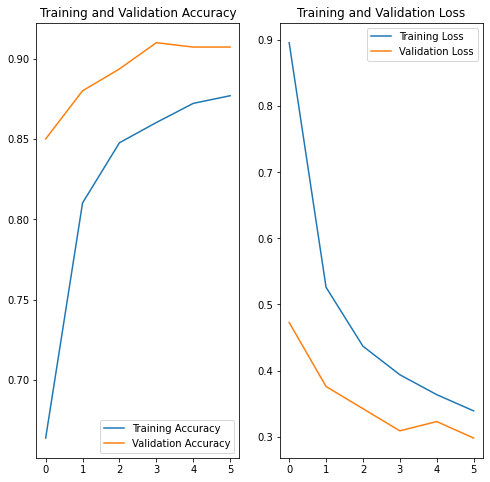

In [ ]:
# Train and validation graph 
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predicted_batch2 = model2.predict(image_batch)
predicted_batch2 = tf.squeeze(predicted_batch2).numpy()

# We take the id_s of the predicted classes and convert them into the actual labels
predicted_ids2 = np.argmax(predicted_batch2, axis=-1)
predicted_class_names2 = class_names[predicted_ids2]

In [ ]:
predicted_ids2, predicted_class_names2

(array([0, 2, 0, 0, 2, 0, 2, 1, 0, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 4, 0, 2,
        2, 3, 1, 0, 1, 4, 4, 3, 4, 4]),
 array(['dandelion', 'tulips', 'dandelion', 'dandelion', 'tulips',
        'dandelion', 'tulips', 'daisy', 'dandelion', 'sunflowers',
        'dandelion', 'dandelion', 'tulips', 'sunflowers', 'dandelion',
        'tulips', 'sunflowers', 'tulips', 'dandelion', 'roses',
        'dandelion', 'tulips', 'tulips', 'sunflowers', 'daisy',
        'dandelion', 'daisy', 'roses', 'roses', 'sunflowers', 'roses',
        'roses'], dtype='<U10'))

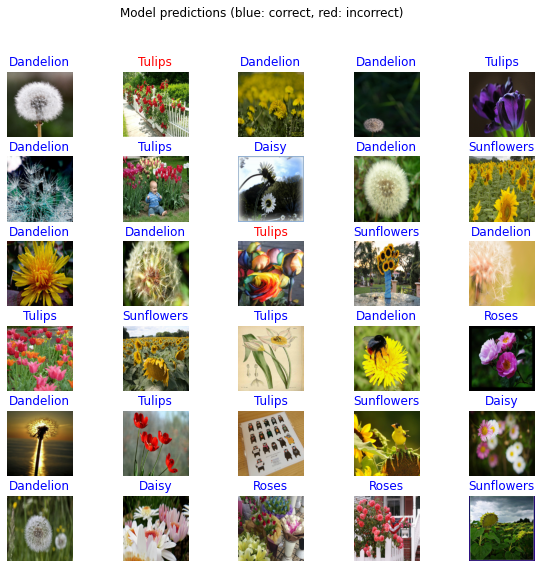

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids2[n] == label_batch[n] else "red"
  plt.title(predicted_class_names2[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

### Exercise 3 (5 points)

Training a model is only the beginning! Select **one of the three** paths below, and follow the instructions.

1. **Interpreting your model**: interpretability is critical in many applications. Good libraries for obtaining interpetations from your model are [tf-explain](https://github.com/sicara/tf-explain), the original [LIME implementation](https://github.com/marcotcr/lime), and IBM [AIX360 Toolbox](https://github.com/Trusted-AI/AIX360). For this path, select an interpretability method, *read carefully the original paper*, and test it on one of your input examples. You can use one of the basic methods seen in the course, or a more advanced variant (e.g., Gradients*Input, Integrated Gradients, ...).

2. **Attacking your model**: there are a number of libraries for crafting an adversarial attack. Possible alternatives are [CleverHans](https://github.com/tensorflow/cleverhans), [Foolbox](https://github.com/bethgelab/foolbox), or the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox). Select one white-box adversarial attack, *read carefully the original paper*, and create an adversarial attack on your network. You can use FGSM as seen in the course, or a more advanced method (e.g., JSMA, ...).

3. **Fairness**: finally, you might want to evaluate whether your model is fair. Good libraries for this are [FAT Forensics](https://fat-forensics.org/) or IBM [AIF360 Toolbox](https://github.com/Trusted-AI/AIF360). For this exercise, select a fairness metric, and evaluate the group fairness on your dataset. Then, apply a post-processing to enforce the fairness, and evaluate the eventual variation in accuracy.

**DESCRIPTION OF THE CODE**: 

**Path:**

For this part of the homework I decided to perform **adversarial attack**, the library I picked was *_Foolbox_*.

**Method:**

As for the method, I picked the one seen in the course, the FGSM (fast gradient sign method) that adds noise to the initial image. This noise has a weight $\epsilon$, it's the impact that it will have on the original image. The key concept is that we are adding a vector of small variations whose elements are equal to the sign of those of the gradient of the cost function (with respect to the input).

**Approach:**

I did as follows:


*   Attack the first model (the one created from scratch)

    *   Plot how the accuracy decreases while $\epsilon$ increases
    *   Show that the original image and the one attacked are visually similar but pixel-wise different.


*   Attack the second model (transfer learning)

    *   Plot how the accuracy decreases while $\epsilon$ increases
    *   Why did I pick two different models? The first reason is because the accuracy score of the first model wasn't too high to start withn and after a couple of trials with different models I decided to use transfer learning. The second reason is because I wanted to test wether the accuracy of better-performing models would tend to decrease so rapidly.

**Results:**

As the paper suggests both models get hit with small values of $\epsilon$ as well.

*   Model 1 takes a big hit at the beginning, but with the growth of $\epsilon$ the slope tends to decrease. The model falls from an accuracy of **0.65** to **0.25**
*   Model 2 decreases more smoothly with the growth of $\epsilon$. The model falls from an accuracy **> 0.90** to **0.1875**





In [ ]:
!pip3 install foolbox==3.1.1


In [ ]:
import foolbox as fb

**Dataset set-up**

In [ ]:
# split data and labels for TEST
images, labels = next(iter(test_batches))

Foolbox Native, the latest version of Foolbox, a popular adversarial attacks library, has been rewritten from scratch using EagerPy instead of NumPy to achieve native performance on models developed in PyTorch, TensorFlow and JAX, all with one code base.

In [ ]:
# EAGER PY
# Just wraps a native tensor using EagerPy
import eagerpy as ep
images = ep.astensor(images)
labels = ep.astensor(labels)

In [ ]:
labels

TensorFlowTensor(<tf.Tensor: shape=(32,), dtype=int64, numpy=
                 array([0, 0, 4, 2, 0, 2, 1, 0, 0, 3, 0, 0, 3, 4, 0, 2, 0, 2, 3, 4, 2, 2,
                        0, 1, 0, 1, 3, 4, 3, 4, 4, 0])>)

#### Attack on model built from scratch

In [ ]:
# Returns a new model with the desired bounds and updates the preprocessing accordingly
bounds = (0, 1)
fmodel = fb.TensorFlowModel(model, bounds=bounds)

# This is the accuracy we get without the adversarial attack
fb.utils.accuracy(fmodel, images, labels)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


0.5625

In [ ]:
#Run attack 
attack = fb.attacks.FGSM()

The criterion we use are the union of Misclassification, TargetedMisclassification. So the accuracy is actually **(1-accuracy)**.

In [ ]:
# This is just to show what happens if we only take one epsilon
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.04)

In [ ]:
is_adv

TensorFlowTensor(<tf.Tensor: shape=(32,), dtype=bool, numpy=
                 array([False,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True, False,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True])>)

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

In [ ]:
# The accuracy of the model
robust_accuracy

TensorFlowTensor(<tf.Tensor: shape=(), dtype=float32, numpy=0.0625>)

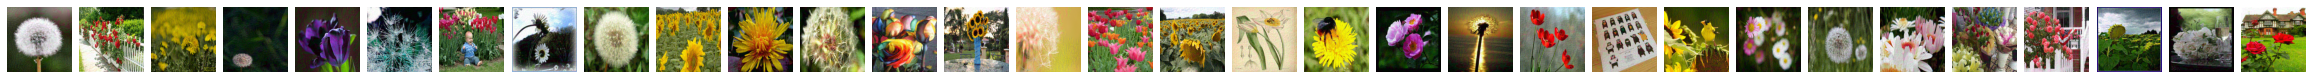

In [ ]:
fb.plot.images(raw)

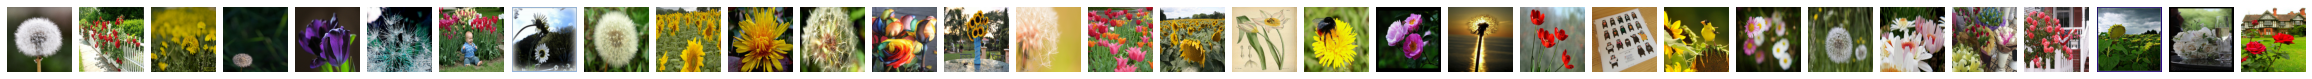

In [ ]:
fb.plot.images(image_batch)

They look the same, but pixel-wise are they really the same? **No**, as we can see the values for the first image are different.

In [ ]:
(image_batch[0]==raw[0]).all()


TensorFlowTensor(<tf.Tensor: shape=(), dtype=bool, numpy=False>)

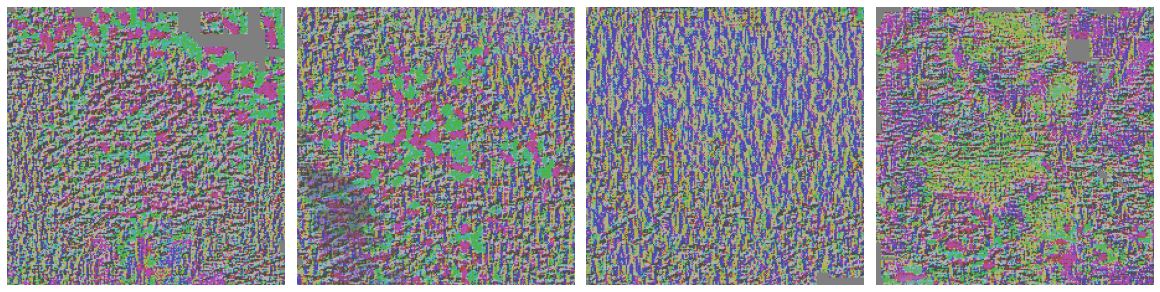

In [ ]:
# This is what the noise looks like
fb.plot.images(raw - images, n=4, bounds=(-0.1, 0.1), scale=4.)

This is the result when using an epsilon equal to **0.03**. As we can see the accuracy for this batch is equal to 0.03125, we can tweak the weight (epsilon) of the noise that we add to the initial image in order to increase or reduce the accuracy.

In [ ]:
# We are going to take a list of epsilons
epsilons = np.linspace(0.0, 0.005, num=20)
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

In [ ]:
robust_accuracy

TensorFlowTensor(<tf.Tensor: shape=(20,), dtype=float32, numpy=
                 array([0.5625 , 0.5    , 0.5    , 0.46875, 0.46875, 0.46875, 0.4375 ,
                        0.4375 , 0.40625, 0.34375, 0.34375, 0.3125 , 0.3125 , 0.3125 ,
                        0.28125, 0.28125, 0.28125, 0.28125, 0.28125, 0.28125],
                       dtype=float32)>)

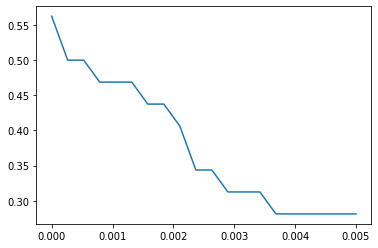

In [ ]:
plt.plot(epsilons, robust_accuracy.numpy())


#### Attack on transfer learning model

In [ ]:
# Returns a new model with the desired bounds and updates the preprocessing accordingly
bounds = (0, 1)
fmodel2 = fb.TensorFlowModel(model2, bounds=bounds)

In [ ]:
fb.utils.accuracy(fmodel2, images, labels)

0.9375

In [ ]:
attack = fb.attacks.FGSM()

In [ ]:
# We are going to take a list of epsilons
epsilons = np.linspace(0.0, 0.005, num=20)
#Run attack 
raw, clipped, is_adv = attack(fmodel2, images, labels, epsilons=epsilons)

In [ ]:
is_adv.float32().mean(axis=-1)

TensorFlowTensor(<tf.Tensor: shape=(20,), dtype=float32, numpy=
                 array([0.0625 , 0.3125 , 0.375  , 0.4375 , 0.53125, 0.625  , 0.6875 ,
                        0.71875, 0.78125, 0.78125, 0.78125, 0.8125 , 0.8125 , 0.84375,
                        0.875  , 0.875  , 0.875  , 0.875  , 0.875  , 0.875  ],
                       dtype=float32)>)

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

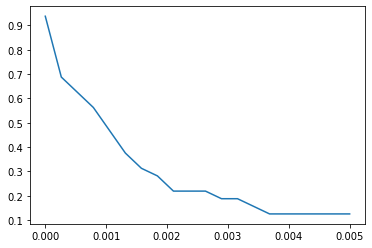

In [ ]:
plt.plot(epsilons, robust_accuracy.numpy())

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

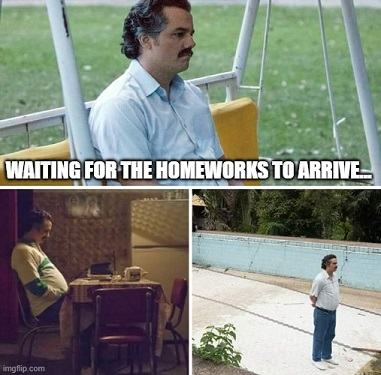